# Predictive Models with Titanic Dataset (IST5520/IST5535)

Try to understand the process. Also, change the set of variables and compare the results. This excercise will help you to do data analysis for your project.

Let`s check the columns in the Titanic Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

print(titanic.columns)
print ("--------------- variable types---------------")
print(titanic.info())
print("--------------- shape check---------------")
print(titanic.shape)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
--------------- variable types---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive     

# Check missing values

In [2]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Check for missing (null) values
missing_values = titanic.isnull().sum()

# Convert to DataFrame for better readability
missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])
missing_values_df['Percentage (%)'] = (missing_values_df['Missing Values'] / len(titanic)) * 100

# Display missing values table
missing_values_df


,Missing Values,Percentage (%)
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


you can use a profiling library "ProfileReport" to better understand your data
(Note recommended for IST5520)

In [3]:
#pip install ydata-profiling   ##Youn need to install this do run the code below
import pandas as pd
from ydata_profiling import ProfileReport

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Generate a profile report
profile = ProfileReport(titanic, title="Titanic Dataset Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("titanic_profiling_report.html")

# Display the report in a Jupyter Notebook (optional)
profile.to_notebook_iframe()


ModuleNotFoundError: No module named 'pkg_resources'

Let`s check the distribution of Numerical Variables, including our target variable

In [4]:
# Identify numerical and categorical variables
numerical_vars = titanic.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = titanic.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Print the lists
print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)

Numerical Variables: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical Variables: ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


I am going to drop deck variable as it has too many missing variable.
Also, drop alive variable

Note that some varialbes, like who (man, woman, child) carries duplicated information. Can you identify other derived variables?

Such variables can introduce multicollinearity and also make the model more complex. We want parsimony.

However, we don`t know which one do the better prediction. So, we will need to do some Feature selection.

In [5]:
numerical_vars = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
categorical_vars= ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']

Let`s check the distribution of Numerical Variables, including our target variable

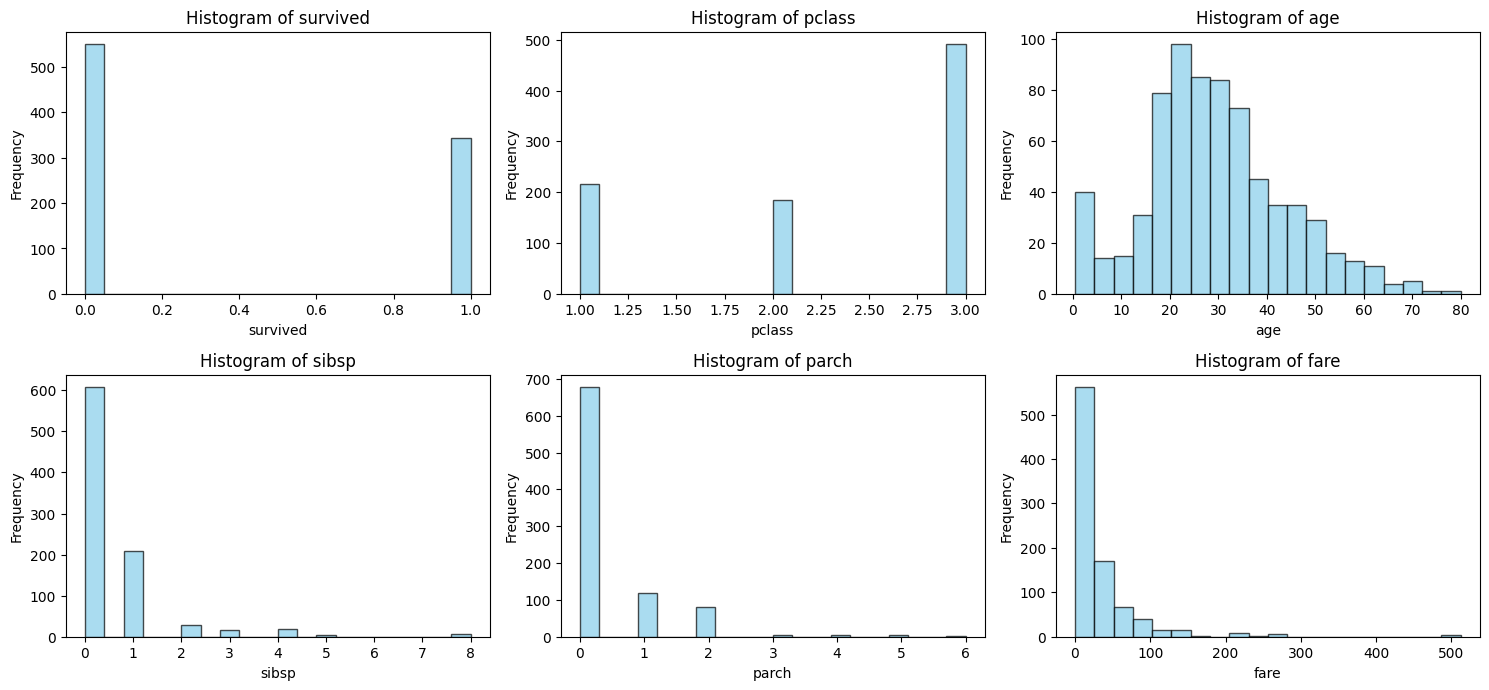

In [6]:
# Generate histograms for numerical variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)  # Adjust layout for better visualization
    plt.hist(titanic[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

And the summary statistics

In [8]:
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Generate summary statistics
numerical_summary = titanic[numerical_vars].describe().T
numerical_summary['median'] = titanic[numerical_vars].median()


# Select relevant columns
numerical_summary = numerical_summary[['mean', 'std', 'median', 'min', 'max']]
numerical_summary.columns = ['Mean', 'SD', 'Median', 'Min', 'Max']

# Display the summary table
numerical_summary


,Mean,SD,Median,Min,Max
survived,0.383838,0.486592,0.0000,0.00,1.0000
pclass,2.308642,0.836071,3.0000,1.00,3.0000
age,29.699118,14.526497,28.0000,0.42,80.0000
sibsp,0.523008,1.102743,0.0000,0.00,8.0000
parch,0.381594,0.806057,0.0000,0.00,6.0000
fare,32.204208,49.693429,14.4542,0.00,512.3292


Let`s check the distribution of Categorical Variables

{'sex': 2, 'embarked': 3, 'class': 3, 'who': 3, 'adult_male': 2, 'embark_town': 3, 'alone': 2}


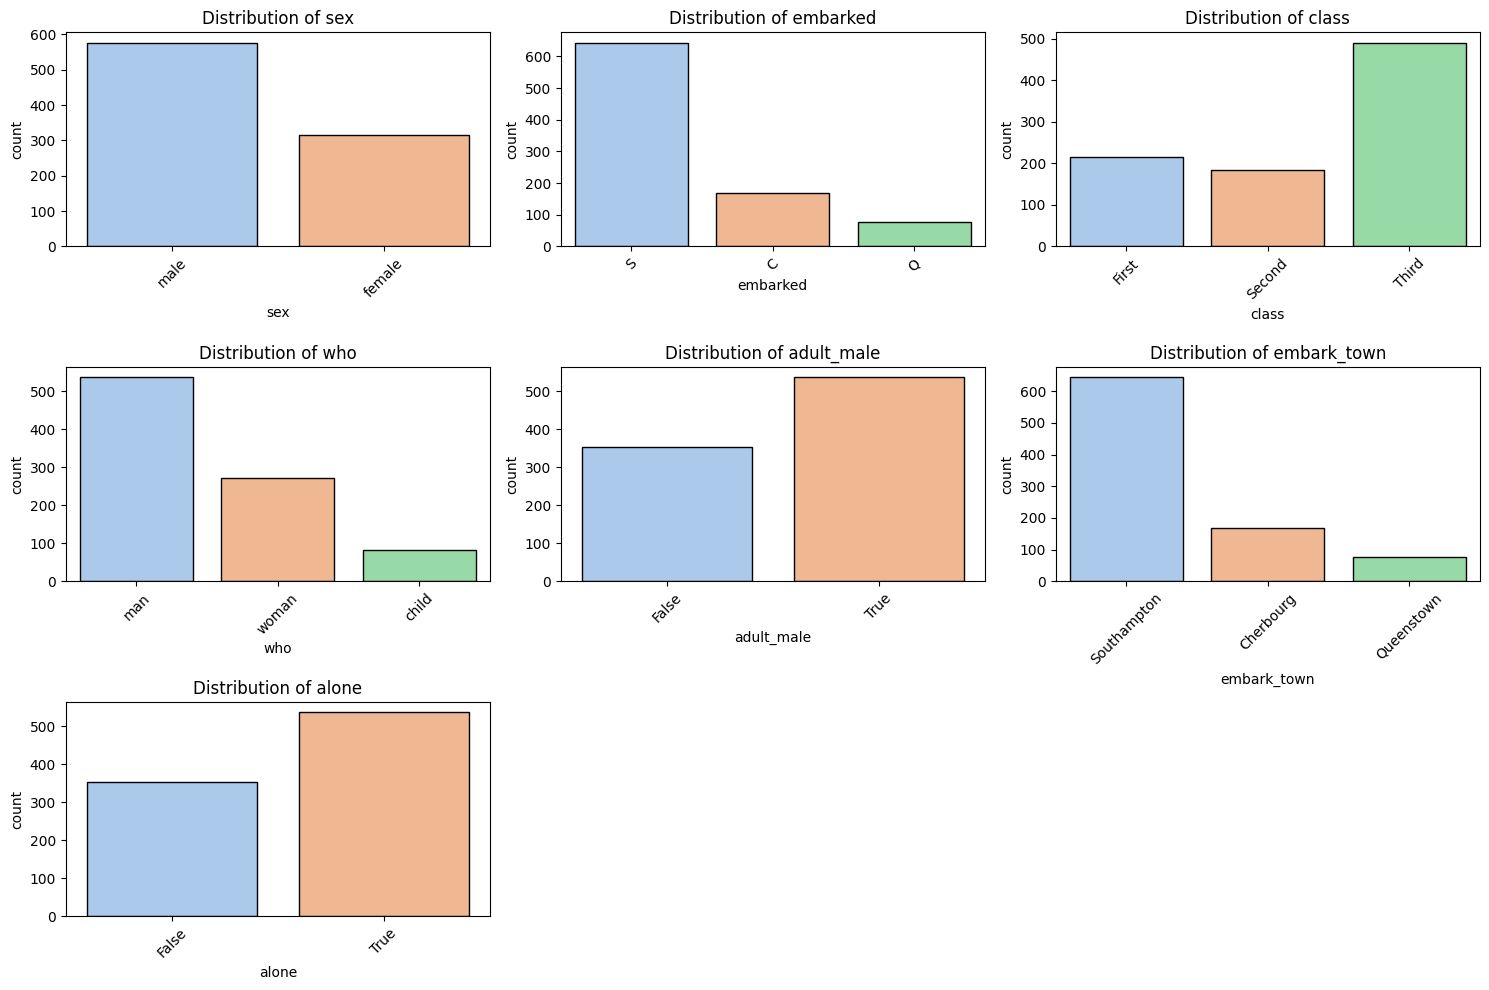

In [9]:
unique_counts = {col: titanic[col].nunique() for col in categorical_vars}
print(unique_counts)

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)  # Adjust layout for better visualization
    sns.countplot(data=titanic, x=col, hue=col, palette="pastel", edgecolor="black", legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Let`s check the proportion of each class in categorical variables

In [10]:
import pandas as pd


# Initialize an empty list to store frequency data
freq_data = []

# Calculate frequency and proportion for each categorical variable
for col in categorical_vars:
    counts = titanic[col].value_counts(dropna=False)  # Includes NaN counts
    percentages = titanic[col].value_counts(normalize=True, dropna=False) * 100
    for category, count in counts.items():
        freq_data.append([col, category, count, f"{percentages[category]:.2f}%"])

# Convert list to DataFrame
freq_table = pd.DataFrame(freq_data, columns=['Variable', 'Category', 'Count', 'Percentage'])

# Display the summary table
print(freq_table)


       Variable     Category  Count Percentage
0           sex         male    577     64.76%
1           sex       female    314     35.24%
2      embarked            S    644     72.28%
3      embarked            C    168     18.86%
4      embarked            Q     77      8.64%
5      embarked          NaN      2      0.22%
6         class        Third    491     55.11%
7         class        First    216     24.24%
8         class       Second    184     20.65%
9           who          man    537     60.27%
10          who        woman    271     30.42%
11          who        child     83      9.32%
12   adult_male         True    537     60.27%
13   adult_male        False    354     39.73%
14  embark_town  Southampton    644     72.28%
15  embark_town    Cherbourg    168     18.86%
16  embark_town   Queenstown     77      8.64%
17  embark_town          NaN      2      0.22%
18        alone         True    537     60.27%
19        alone        False    354     39.73%


Feature Engineering & Selection

Crruently we have:



*   numerical_vars = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
*   categorical_vars= ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']






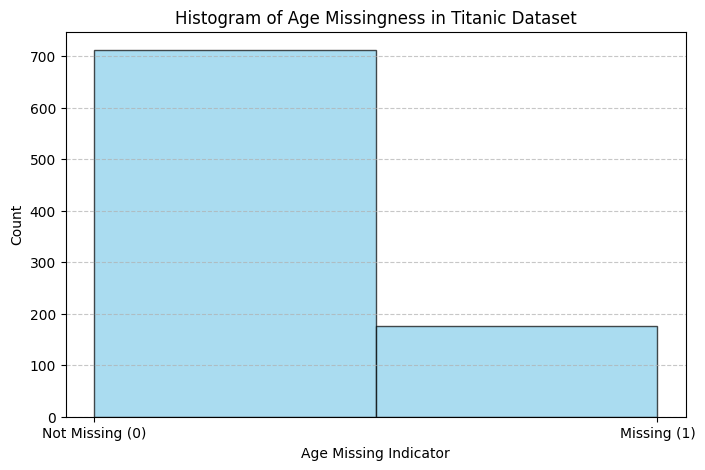

,survived,pclass,age,sibsp,parch,fare,age_cleaned,age_null,sex_female,sex_male,...,who_child,who_man,who_woman,adult_male_False,adult_male_True,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True
0,0,3,22.0,1,0,7.2500,22.0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,38.0,0,1,0,...,0,0,1,1,0,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,26.0,0,1,0,...,0,0,1,1,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,35.0,0,1,0,...,0,0,1,1,0,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,35.0,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [11]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
data = sns.load_dataset('titanic')

# Select numerical and categorical variable names
numerical_vars = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
categorical_vars = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']

# Keep only the selected numerical and categorical variables
data = data[numerical_vars + categorical_vars]

# Do something with missing value
data = data.dropna(subset=['embarked', 'embark_town'])                    # decided to delete
# data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)       # but, you can relace to most common one.
#data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)
data['age_cleaned'] = data['age'].fillna(data['age'].median())            # fill up with median.
# Create a new binary variable (1 if Age is missing, 0 if not)
data['age_null'] = data['age'].isnull().astype(int)                                                                         # maybe missing age value can do something good.

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=categorical_vars, drop_first=False, dtype=int) # drop_frist=True dropes the first class; dtype=int makes 1 and 0 instead True and False

# Generate a histogram for the 'age_null_cleaned' variable
plt.figure(figsize=(8, 5))
plt.hist(data['age_null'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0, 1], labels=["Not Missing (0)", "Missing (1)"])
plt.xlabel("Age Missing Indicator")
plt.ylabel("Count")
plt.title("Histogram of Age Missingness in Titanic Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Display the modified dataset
data.head()

In [12]:
#numerical_vars = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
#categorical_vars = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']

data.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'age_cleaned',
       'age_null', 'sex_female', 'sex_male', 'embarked_C', 'embarked_Q',
       'embarked_S', 'class_First', 'class_Second', 'class_Third', 'who_child',
       'who_man', 'who_woman', 'adult_male_False', 'adult_male_True',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alone_False', 'alone_True'],
      dtype='object')

**Logistic Regression**

TIP about droping one from dummy
*   Linear Regression/ Logistic Regression/ NaiveBayes(GaussianNB): Drop one dummy for each. (drop_first=True)
*   Decision Tree/ Radnom Forest/ NaiveBayes(MultinomialNB): No need to drop (drop_first=False)



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant features and target
X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned', # 'age_null',
             'sex_female',
             'embarked_Q', 'embarked_S',
             'class_Second', 'class_Third',
             'who_man', 'who_woman',
             'adult_male_True',
             'embark_town_Queenstown', 'embark_town_Southampton',
             'alone_True']]
y = data['survived']



# Check for missing values
print(X.isnull().sum())
print(y.isnull().sum())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           index=["Actual Negative", "Actual Positive"],
                           columns=["Predicted Negative", "Predicted Positive"])

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

pclass                     0
sibsp                      0
parch                      0
fare                       0
age_cleaned                0
sex_female                 0
embarked_Q                 0
embarked_S                 0
class_Second               0
class_Third                0
who_man                    0
who_woman                  0
adult_male_True            0
embark_town_Queenstown     0
embark_town_Southampton    0
alone_True                 0
dtype: int64
0
Accuracy: 0.8277

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       161
           1       0.81      0.75      0.77       106

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267


Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 142                  19
Actual Positive     

## Sklearn do not automatically provide p-value. So, I am going to use statmodels.api to see the coefficients and p-values.


*The result looks funky. Why?*


In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned', # 'age_null',
             'sex_female',
             'embarked_Q', 'embarked_S',
             'class_Second', 'class_Third',
             'who_man', 'who_woman',
             'adult_male_True',
             'embark_town_Queenstown', 'embark_town_Southampton',
             'alone_True']]
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Add a constant to X for the intercept term
X_train_const = sm.add_constant(X_train)

# Fit logistic regression model using statsmodels to get coefficients and p-values
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Display the summary which includes coefficients and p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.424177
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      608
Method:                           MLE   Df Model:                           13
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                  0.3594
Time:                        19:17:45   Log-Likelihood:                -263.84
converged:                       True   LL-Null:                       -411.87
Covariance Type:            nonrobust   LLR p-value:                 1.597e-55
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.8745        nan        nan        nan         nan   

Answers: Because Multicollinearity or Numerical Instability

***I randomly deleted from variables, and we found the stability.***

*** But, that does not mean give better predictive power. ***

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned', # 'age_null',
             'sex_female',
                                # omitted#
             'alone_True']]
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Add a constant to X for the intercept term
X_train_const = sm.add_constant(X_train)

# Fit logistic regression model using statsmodels to get coefficients and p-values
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Display the summary which includes coefficients and p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.438406
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            7
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                  0.3379
Time:                        19:17:48   Log-Likelihood:                -272.69
converged:                       True   LL-Null:                       -411.87
Covariance Type:            nonrobust   LLR p-value:                 2.500e-56
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4572      0.628      3.910      0.000       1.226       3.689
pclass         -0.9958    

-> Interpretation:



*   In logistic regression, coefficients represent the log odds of the outcome
changing when that predictor changes by one unit, while holding all other variables constant.


*   A coefficient of 2.6595 means that being female increases the log-odds of survival by 2.6595.
*   Odds Ratio = e^2.6595 = 14.3; Females are 14.3 times more likely to survive than males (the reference category), holding all other factors constant.



*****When we check the Accuracy difference, **Accuracy: 0.8277 -> Accuracy: 0.7865***

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned', # 'age_null',
             'sex_female',
                                # omitted#
             'alone_True']]
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                           index=["Actual Negative", "Actual Positive"],
                           columns=["Predicted Negative", "Predicted Positive"])

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.7865

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       161
           1       0.75      0.69      0.72       106

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.79      0.78       267


Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 137                  24
Actual Positive                  33                  73


Check if age_null improve the predictive performance

**Decision Tree (my random pick for max_depth=5)**

So, we got accuracy of 0.809. Check what happens if we use random_state=43.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Select relevant features and target
X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned',
          'sex_female', 'embarked_Q', 'embarked_S',
          'class_Second', 'class_Third', 'who_man', 'who_woman',
          'adult_male_True', 'embark_town_Queenstown', 'embark_town_Southampton',
          'alone_True']]
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Initialize and train the Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=48)  # Limiting depth to prevent overfitting
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
classification_rep_dtree = classification_report(y_test, y_pred_dtree)
conf_matrix_dtree = pd.DataFrame(confusion_matrix(y_test, y_pred_dtree),
                                 index=["Actual Negative", "Actual Positive"],
                                 columns=["Predicted Negative", "Predicted Positive"])

# Display results
print(f"Decision Tree Accuracy: {accuracy_dtree:.4f}")
print("\nDecision Tree Classification Report:\n", classification_rep_dtree)
print("\nConfusion Matrix:\n", conf_matrix_dtree)


Decision Tree Accuracy: 0.8090

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       161
           1       0.81      0.68      0.74       106

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267


Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 144                  17
Actual Positive                  34                  72


-> What was the result when you changed random_state =43?  Small data is shakey.

We acheived accuracy of 0.8240 with much smaller number of features.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Select relevant features and target

X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned', # 'age_null',
             'sex_female',
                                # omitted#
             'alone_True']]
y = data['survived']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Initialize and train the Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=48)  # Limiting depth to prevent overfitting
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
classification_rep_dtree = classification_report(y_test, y_pred_dtree)
conf_matrix_dtree = pd.DataFrame(confusion_matrix(y_test, y_pred_dtree),
                                 index=["Actual Negative", "Actual Positive"],
                                 columns=["Predicted Negative", "Predicted Positive"])

# Display results
print(f"Decision Tree Accuracy: {accuracy_dtree:.4f}")
print("\nDecision Tree Classification Report:\n", classification_rep_dtree)
print("\nConfusion Matrix:\n", conf_matrix_dtree)


Decision Tree Accuracy: 0.8240

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       161
           1       0.86      0.67      0.75       106

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267


Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 149                  12
Actual Positive                  35                  71


***Find the optimal decision tree split***

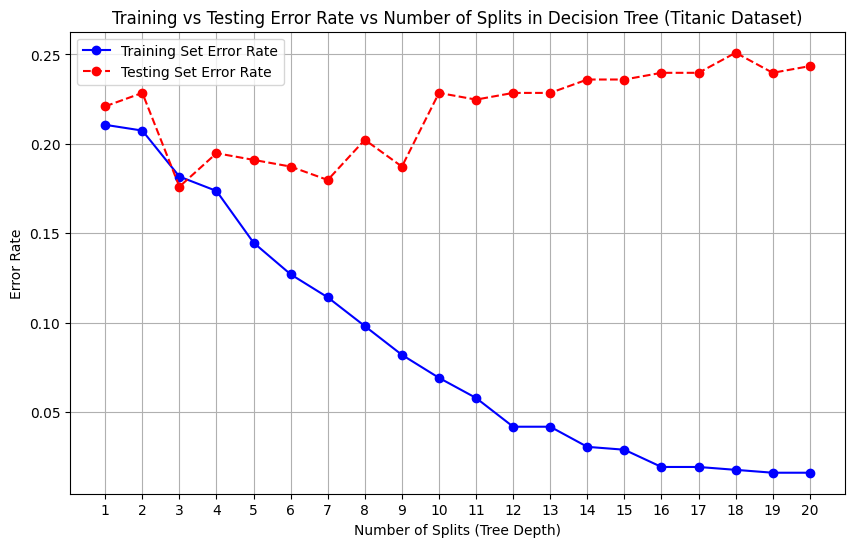

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Titanic dataset
data = sns.load_dataset('titanic')

# Select numerical and categorical variable names
numerical_vars = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
categorical_vars = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']

# Keep only the selected numerical and categorical variables
data = data[numerical_vars + categorical_vars]

# Do something with missing value
data = data.dropna(subset=['embarked', 'embark_town'])                    # decided to delete
# data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)       # but, you can relace to most common one.
#data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)
data['age_cleaned'] = data['age'].fillna(data['age'].median())            # fill up with median.
# Create a new binary variable (1 if Age is missing, 0 if not)
data['age_null'] = data['age'].isnull().astype(int)                                                                         # maybe missing age value can do something good.

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=categorical_vars, drop_first=False, dtype=int) # drop_frist=True dropes the first class; dtype=int makes 1 and 0 instead True and False

# Select relevant features and target
X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned',
          'sex_female', 'embarked_Q', 'embarked_S',
          'class_Second', 'class_Third', 'who_man', 'who_woman',
          'adult_male_True', 'embark_town_Queenstown', 'embark_town_Southampton',
          'alone_True']]
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Initialize lists to store the number of splits (depth) and error rates for training and testing sets
depths = range(1, 21)  # Testing tree depths from 1 to 20
train_error_rates = []
test_error_rates = []

# Loop over different tree depths and calculate the error rate for both training and testing sets
for depth in depths:
    # Create a Decision Tree classifier with varying max_depth
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=48)

    # Train the classifier
    dtree.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = dtree.predict(X_train)
    # Predict on the test set
    y_test_pred = dtree.predict(X_test)

    # Calculate the error rate for training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Error rate is (1 - accuracy)
    train_error_rate = 1 - train_accuracy
    test_error_rate = 1 - test_accuracy

    train_error_rates.append(train_error_rate)
    test_error_rates.append(test_error_rate)

# Plot the number of splits (tree depth) vs error rates for both training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(depths, train_error_rates, marker='o', linestyle='-', color='b', label='Training Set Error Rate')
plt.plot(depths, test_error_rates, marker='o', linestyle='--', color='r', label='Testing Set Error Rate')
plt.xlabel('Number of Splits (Tree Depth)')
plt.ylabel('Error Rate')
plt.title('Training vs Testing Error Rate vs Number of Splits in Decision Tree (Titanic Dataset)')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()


***Decision Tree with max_depth =3 & Visualization ***

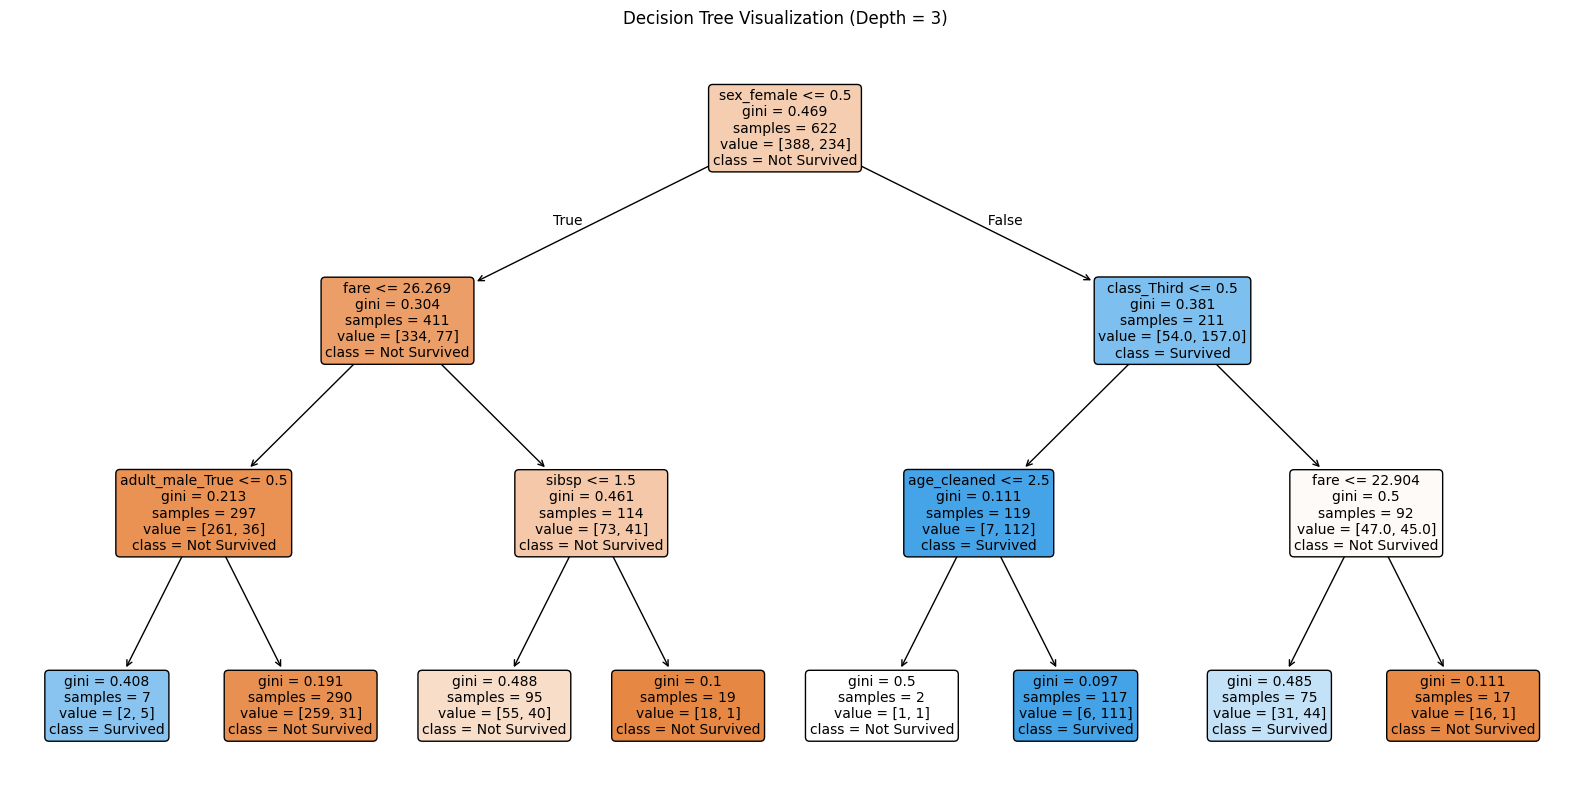

Decision Tree Accuracy: 0.8240

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       161
           1       0.80      0.75      0.77       106

    accuracy                           0.82       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267


Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 141                  20
Actual Positive                  27                  79


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load Titanic dataset
data = sns.load_dataset('titanic')

# Select numerical and categorical variable names
numerical_vars = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
categorical_vars = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']

# Keep only the selected numerical and categorical variables
data = data[numerical_vars + categorical_vars]

# Do something with missing value
data = data.dropna(subset=['embarked', 'embark_town'])                    # decided to delete
# data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)       # but, you can relace to most common one.
#data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)
data['age_cleaned'] = data['age'].fillna(data['age'].median())            # fill up with median.
# Create a new binary variable (1 if Age is missing, 0 if not)
data['age_null'] = data['age'].isnull().astype(int)                                                                         # maybe missing age value can do something good.

# Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=categorical_vars, drop_first=False, dtype=int) # drop_frist=True dropes the first class; dtype=int makes 1 and 0 instead True and False

# Select relevant features and target
X = data[['pclass', 'sibsp', 'parch', 'fare', 'age_cleaned',
          'sex_female', 'embarked_Q', 'embarked_S',
          'class_Second', 'class_Third', 'who_man', 'who_woman',
          'adult_male_True', 'embark_town_Queenstown', 'embark_town_Southampton',
          'alone_True']]
y = data['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Initialize and train the Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=3, random_state=48)  # Limiting depth to prevent overfitting
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
classification_rep_dtree = classification_report(y_test, y_pred_dtree)
conf_matrix_dtree = pd.DataFrame(confusion_matrix(y_test, y_pred_dtree),
                                 index=["Actual Negative", "Actual Positive"],
                                 columns=["Predicted Negative", "Predicted Positive"])

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Depth = 3)")
plt.show()

# Display results
print(f"Decision Tree Accuracy: {accuracy_dtree:.4f}")
print("\nDecision Tree Classification Report:\n", classification_rep_dtree)
print("\nConfusion Matrix:\n", conf_matrix_dtree)
